In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [6]:
#Cargar el archivo cvs
data =  pd.read_csv("C:/Users/ALYE1/OneDrive/Documents/La U mi perro/S9/Análisis de Datos/T2/logistica/framingham.csv", sep=",")

In [9]:
#En este caso para evitar errores y malversación en la información eliminaré los datos NA
data = data.dropna()

In [11]:
#Dividir las variables para separar TenYearCHD
X = data.drop("TenYearCHD", axis=1)
y = data["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Crear y asignar el modelo
regression = LogisticRegression(max_iter=5000)
regression.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [16]:
#Realizar predicción
prediction_y = regression.predict(X_test)

In [17]:
#Calculo la precisión
accuracy = accuracy_score(y_test, prediction_y)

In [18]:
#Calculo de matriz de confusión
matriz = confusion_matrix(y_test, prediction_y)

In [19]:
#Informe de clasificación
report = classification_report(y_test, prediction_y)

In [21]:
#Área bajo la curva
curveArea = roc_auc_score(y_test, regression.predict_proba(X_test)[:, 1])

In [22]:
#mostrar los calculos, informes y areas
print(f"Precisión: {accuracy}")
print(f"Matriz de confusión:\n{matriz}")
print(f"Informe de clasificación:\n{report}")
print(f"Area bajo la curva: {curveArea}")

Precisión: 0.837431693989071
Matriz de confusión:
[[603   7]
 [112  10]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.59      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.72      0.54      0.53       732
weighted avg       0.80      0.84      0.78       732

Area bajo la curva: 0.6999865627519484


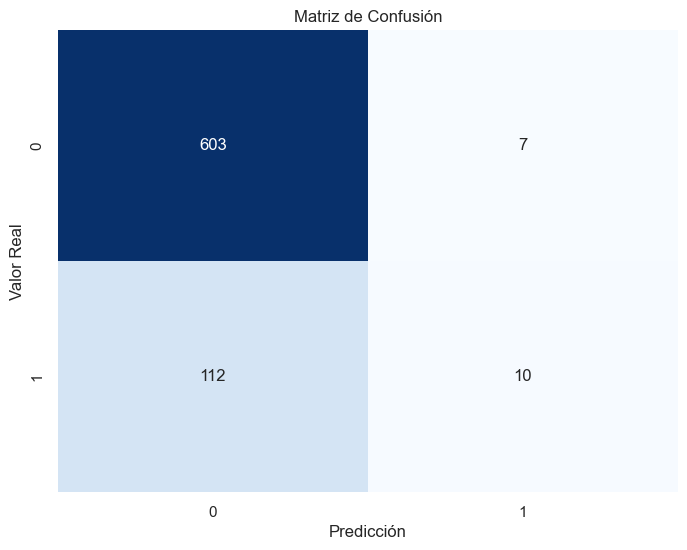

In [29]:
#Grafica de matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

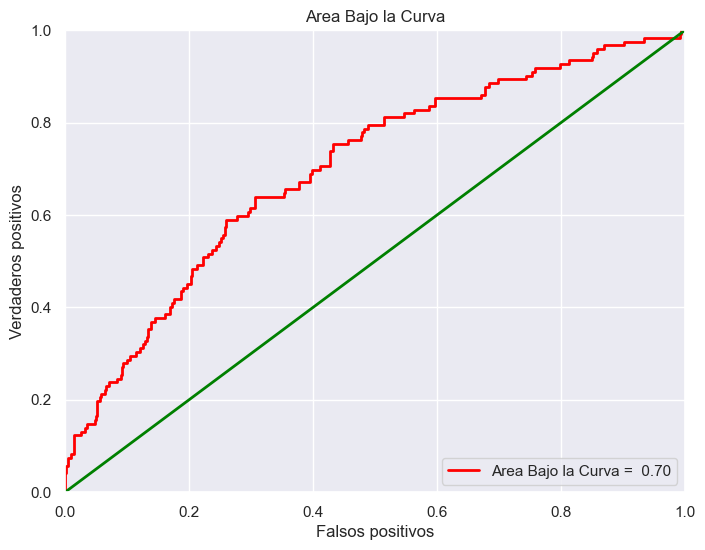

In [34]:
#Grafica del area bajo la curva
fpr, tpr, thresholds = roc_curve(y_test, regression.predict_proba(X_test)[:, 1])
curveArea = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="red", lw=2, label=f"Area Bajo la Curva = {curveArea: .2f}")
plt.plot([0,1], [0,1], color="green", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Area Bajo la Curva")
plt.legend(loc="lower right")
plt.show()

In [36]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Figure size 800x400 with 0 Axes>

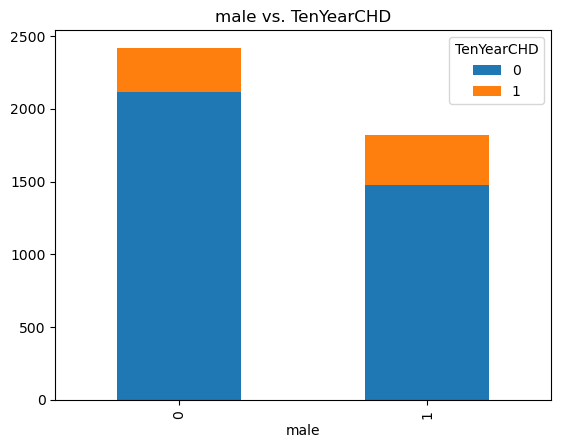

<Figure size 800x400 with 0 Axes>

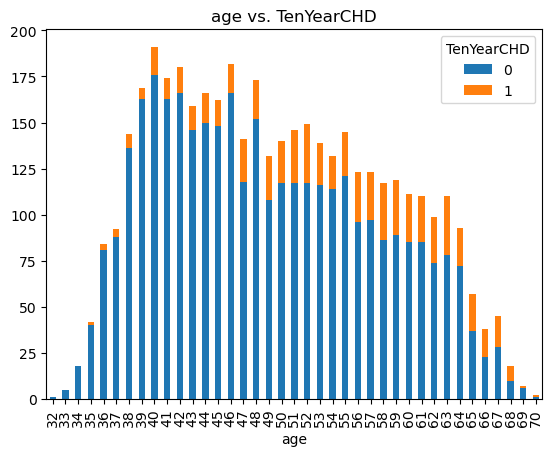

<Figure size 800x400 with 0 Axes>

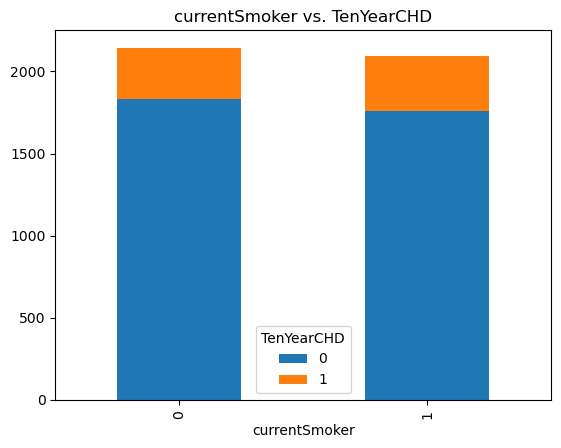

<Figure size 800x400 with 0 Axes>

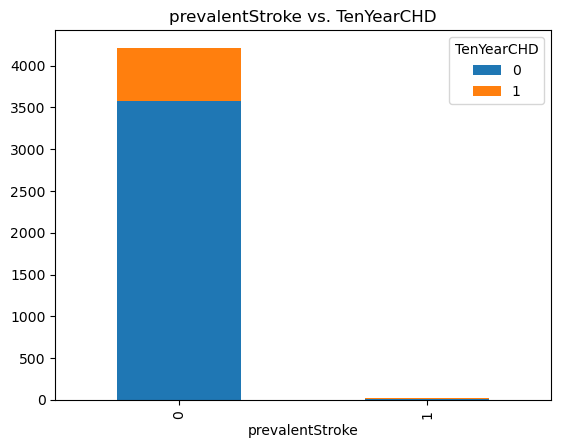

<Figure size 800x400 with 0 Axes>

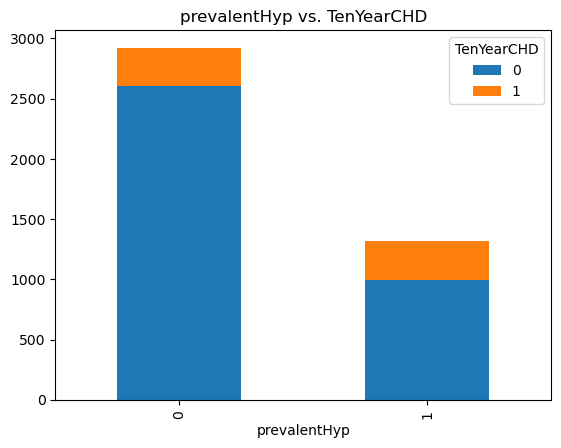

<Figure size 800x400 with 0 Axes>

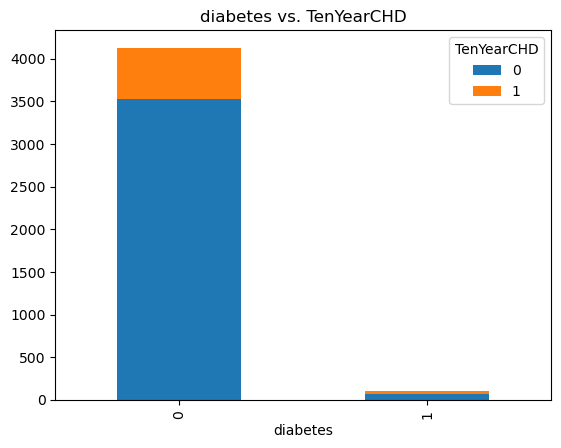

In [9]:
independent_variables = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for variable in independent_variables:
    if data[variable].dtype == 'int64':
        plt.figure(figsize=(8, 4))
        data.groupby('TenYearCHD')[variable].value_counts().unstack(0).plot(kind='bar', stacked=True)
        plt.title(f'{variable} vs. TenYearCHD')
        plt.show()